In [1]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Importing libraries skimage,matplotlib,numpy

In [2]:
import os

path = "610 training"
imageNames = []

for i in os.scandir(path):
    imageNames.append(i.path)

imageNames


['610 training\\100075.jpg',
 '610 training\\100080.jpg',
 '610 training\\100098.jpg',
 '610 training\\103041.jpg',
 '610 training\\104022.jpg',
 '610 training\\105019.jpg',
 '610 training\\105053.jpg',
 '610 training\\106020.jpg',
 '610 training\\106025.jpg',
 '610 training\\108041.jpg',
 '610 training\\108073.jpg',
 '610 training\\109034.jpg',
 '610 training\\112082.jpg',
 '610 training\\113009.jpg',
 '610 training\\113016.jpg',
 '610 training\\113044.jpg',
 '610 training\\117054.jpg',
 '610 training\\118020.jpg',
 '610 training\\118035.jpg',
 '610 training\\12003.jpg',
 '610 training\\12074.jpg',
 '610 training\\122048.jpg',
 '610 training\\124084.jpg',
 '610 training\\126039.jpg',
 '610 training\\130034.jpg',
 '610 training\\134008.jpg',
 '610 training\\134052.jpg',
 '610 training\\135037.jpg',
 '610 training\\135069.jpg',
 '610 training\\138032.jpg',
 '610 training\\138078.jpg',
 '610 training\\140055.jpg',
 '610 training\\140075.jpg',
 '610 training\\144067.jpg',
 '610 training\\

Import all the training set of images

100


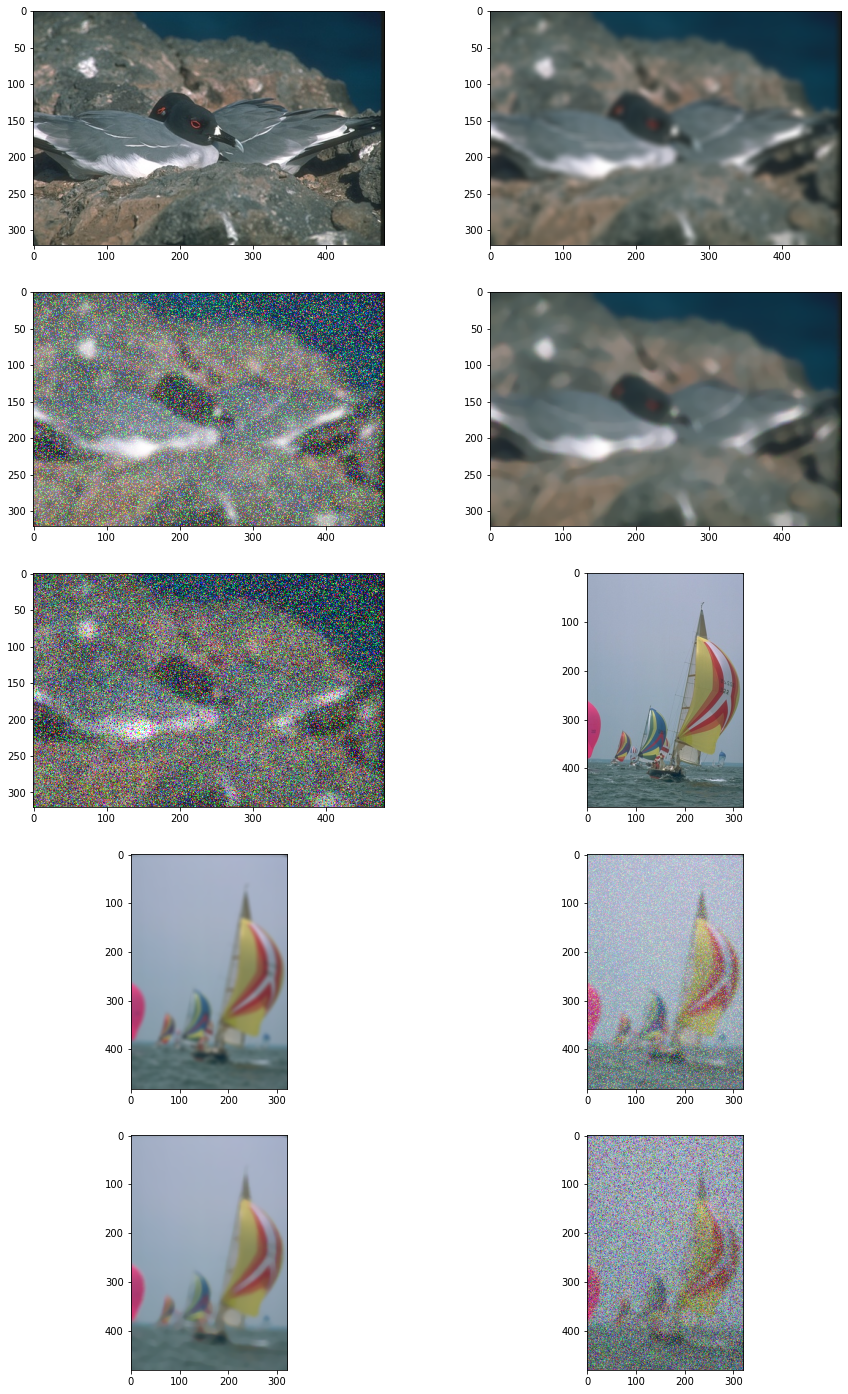

In [7]:
from matplotlib import image
from skimage.util import random_noise
import cv2
import random

plt.rcParams["figure.figsize"] = [15,25]
k=len(os.listdir(path))
print(k)
g_blur=[]
noi=[]
blur =[]
noise=[]
patch=[]
def gaussian_blur(W):
    g = cv2.GaussianBlur(img,(W,W),cv2.BORDER_DEFAULT)
    return g
def median_blur(W):
    m = cv2.medianBlur(noisy,W)
    return m
def gaussian_noise(W):
    gauss = np.random.normal(0,1,blurred.size)
    gauss = gauss.reshape(blurred.shape[0],blurred.shape[1],blurred.shape[2]).astype('uint8')
    # Add the Gaussian noise to the image
    h = cv2.add(blurred,gauss)
    return h
def salt_and_pepper():
    # Add salt-and-pepper noise to the image.
    n = random_noise(median, mode='s&p',amount=0.3)

    # The above function returns a floating-point image
    # on the range [0, 1], thus we changed it to 'uint8'
    # and from [0,255]
    n= np.array(255*n, dtype = 'uint8')
    return n

for i in range(k):
    imageNum =i
    img = image.imread(imageNames[imageNum])
    W=13
    blurred = gaussian_blur(W)
    g_blur.append(blurred)
    noisy=gaussian_noise(W)
    noi.append(noisy)
    W=13
    median=median_blur(W)
    blur.append(median)
    s_p=salt_and_pepper()
    noise.append(s_p)
    W = 13 # Patch max window size
    numPatches = 5000
    patches = np.empty((numPatches,W,W,3), dtype=float) # Initilizing patch n-d array

    for j in range(0,numPatches): # For number of patches
    
      x = random.randint(0, img.shape[0]-W) # Random x location so that the patch 
                                              # remains within image boundaries
   
      y = random.randint(0, img.shape[1]-W) # Random y location
                                              # remains within image boundaries
       
      patches[j,:,:,:] = noise[i][x:x+W,y:y+W,:]/255.0 # Extract patch
                                              # Divide by 255 for float images
      # Display sub-patch
      #plt.imshow(patches[j,0:int(W+W/2),0:int(W+W/2),:])
      
      #plt.show()
      
      patch=np.array(patches)
      #plt.imshow(patch[])
        



imageNum = 3 # Eleventh image in the directory will be read

img = image.imread(imageNames[imageNum]) # Read image
plt.subplot(5,2,1)
plt.imshow(img)
plt.subplot(5,2,2)
plt.imshow(g_blur[imageNum])
plt.subplot(5,2,3)
plt.imshow(noi[imageNum])
plt.subplot(5,2,4)
plt.imshow(blur[imageNum])
plt.subplot(5,2,5)
plt.imshow(noise[imageNum])
#print(patch.shape)

imageNum = 57 # Eleventh image in the directory will be read

img = image.imread(imageNames[imageNum]) # Read image
plt.subplot(5,2,6)
plt.imshow(img)
plt.subplot(5,2,7)
plt.imshow(g_blur[imageNum])
plt.subplot(5,2,8)
plt.imshow(noi[imageNum])
plt.subplot(5,2,9)
plt.imshow(blur[imageNum])
plt.subplot(5,2,10)
plt.imshow(noise[imageNum])
#print(patch.shape)

On every training image, gaussian blur of kernel size 13 is applied followed by gaussian noise.For multiple degradation medain blur is added to the noisy image and again salt and pepper noise is added on that. Patches of size 13x13 are extracted from the degraded image.

In [8]:
import tensorflow as tf

path = "610 test"
imagetest = []

for i in os.scandir(path):
    imagetest.append(i.path)

imagetest

['610 test\\101085.jpg',
 '610 test\\101087.jpg',
 '610 test\\102061.jpg',
 '610 test\\103070.jpg',
 '610 test\\105025.jpg',
 '610 test\\106024.jpg',
 '610 test\\108005.jpg',
 '610 test\\108070.jpg',
 '610 test\\108082.jpg',
 '610 test\\109053.jpg',
 '610 test\\119082.jpg',
 '610 test\\12084.jpg',
 '610 test\\123074.jpg',
 '610 test\\126007.jpg',
 '610 test\\130026.jpg',
 '610 test\\134035.jpg',
 '610 test\\14037.jpg',
 '610 test\\143090.jpg',
 '610 test\\145086.jpg',
 '610 test\\147091.jpg',
 '610 test\\148026.jpg',
 '610 test\\148089.jpg',
 '610 test\\156065.jpg',
 '610 test\\157055.jpg',
 '610 test\\159008.jpg',
 '610 test\\160068.jpg',
 '610 test\\16077.jpg',
 '610 test\\163085.jpg',
 '610 test\\167062.jpg',
 '610 test\\167083.jpg',
 '610 test\\170057.jpg',
 '610 test\\175032.jpg',
 '610 test\\175043.jpg',
 '610 test\\182053.jpg',
 '610 test\\189080.jpg',
 '610 test\\19021.jpg',
 '610 test\\196073.jpg',
 '610 test\\197017.jpg',
 '610 test\\208001.jpg',
 '610 test\\210088.jpg',
 '61

All the testing images are loaded.

In [5]:
import numpy as np
import random

s=len(os.listdir(path))
print(s)
W=13
plt.rcParams["figure.figsize"] = [10,5]
testpatches=[]
for m in range(s):
    imageno=m
    img_test=image.imread(imagetest[imageno])

    test_patch_n = 500 # Number of patches to be extracted from this image
    w=1
    patch_test = np.empty((test_patch_n,w,w,3), dtype=float) # Initilizing patch n-d array


    
    for l in range(0,test_patch_n): # For number of patches
        x = random.randint(0, img_test.shape[0]-w) # Random x location so that the patch 
                                                  # remains within image boundaries
        y = random.randint(0, img_test.shape[1]-w) # Random y location
                                                  # remains within image boundaries
        patch_test[l,:,:,:] = img_test[x:x+w,y:y+w,:]/255.0 # Extract patch
                                                        # Divide by 255 for float images
        
        testpatches=np.array(patch_test)
        #print(testpatches.shape)
        central_pixel=patch_test[int(w/2),int(w/2)]
        #print(central_pixel)
         #Display sub-patch
        #plt.imshow(patch_test[l,0:int(w),0:int(w),:])
        #plt.show()
        
  


100


Patches of size 1x1x3 are extracted from the original image and their central pixel is calculated.Maximum window size=13 and window size w=1

In [17]:
w=1

import sys
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import BatchNormalization

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from tensorflow import keras

for i in range(k):
    imageNum =i
    Ytrain = cv2.imread(imageNames[imageNum])
    y=np.array(Ytrain.shape)
    Ytrain=y.reshape(-1,13,13,3)
    
for m in range(s):
    imageno=m
    Ytest=cv2.imread(imagetest[imageno])
    x=np.array(Ytest.shape)
    Ytest=x.reshape(-1,1,1,3)

trainY = to_categorical(img)
testY = to_categorical(img_test)
trainX = patch.astype('float32')
testX = testpatches.astype('float32')
trainX = trainX / 255
testX = testX / 255

model = keras.Sequential()

    # Adding convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(13, 13, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())        #to flatten the output obtained from convolution

    # hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
    # output layer
model.add(Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01) 
    # compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    
    # training the model for 10 epochs
model.fit(trainX, trainY, batch_size=128, epochs=10, validation_data=(testX,testY))

test = model.evaluate(testX, testY, verbose=0)
    




predict_class = Model.predict(Sequential(),testX)
predict_class= np.argmax(np.round(predict_class),axis=1)
print(predict_class)
predicted = np.where(predict_class==testY)[0]

for n, predicted in enumerate(predicted[:s]):
    plt.imshow(testX[predicted].reshape(13,13), interpolation='none')

    
imageNum=3
imageno=3
plt.imshow(plt.imshow(testX[predicted].reshape(13,13), interpolation='none'))

ValueError: cannot reshape array of size 3 into shape (13,13,3)

We used convolutional network model for machine learning model.

(852, 1512, 3)


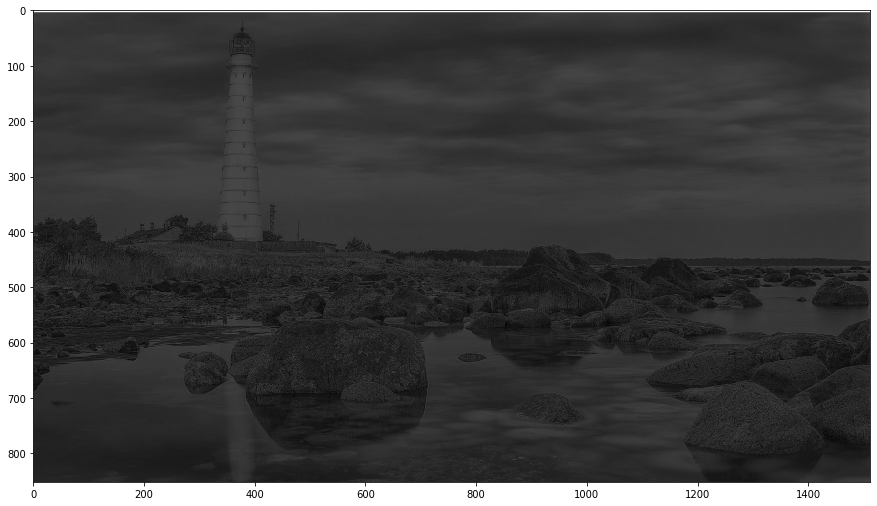

In [9]:
im=cv2.imread('image.jpg')
plt.imshow(im)
print(im.shape)
W=13
numpatches=500

A degraded image is taken to check the model.

In [10]:
for j in range(0,numPatches): # For number of patches
    
      x = random.randint(0, im.shape[0]-W) # Random x location so that the patch 
                                              # remains within image boundaries
   
      y = random.randint(0, im.shape[1]-W) # Random y location
                                              # remains within image boundaries
       
      patches[j,:,:,:] = im[x:x+W,y:y+W,:]/255.0 # Extract patch
                                              # Divide by 255 for float images
      # Display sub-patch
      #plt.imshow(patches[j,0:int(W+W/2),0:int(W+W/2),:])
      
      #plt.show()
      
      

Patches are extracted from the image

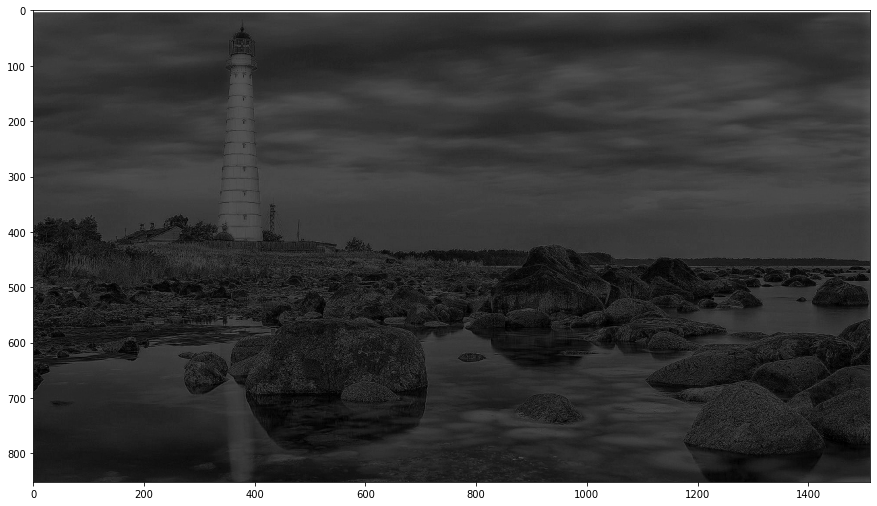

In [11]:
from PIL import Image,ImageFilter  
image = Image.open('image.jpg')

from PIL import ImageEnhance  
enh = ImageEnhance.Contrast(image)  
enhanced=enh.enhance(1.5)
plt.imshow(enhanced)
plt.show() 

Contrast enhancement function

Neural networks can also deal with non-linearities. So, they are better choice.

References:

1.https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
2.https://theailearner.com/tag/salt-and-pepper/
3.https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
4.https://medium.com/spinor/a-straightforward-introduction-to-image-blurring-smoothing-using-python-f8870cf1096
